In [22]:
import numpy as np
import pandas as pd 
import string as st
import sklearn
import regex as re
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import WordNetLemmatizer
import googletrans
from googletrans import Translator
from nrclex import NRCLex
import plotly.express as px
import matplotlib.pyplot as plt
pd.options.plotting.backend = "plotly"
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
# Read Raw Dataset
df = pd.read_csv('anthems.csv',encoding='latin-1')

In [24]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    190 non-null    object
 1   Alpha-2    189 non-null    object
 2   Alpha-3    190 non-null    object
 3   Continent  190 non-null    object
 4   Anthem     190 non-null    object
dtypes: object(5)
memory usage: 7.5+ KB


,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."


In [25]:
df.shape

(190, 5)

In [26]:
df.isnull().sum()

Country      0
Alpha-2      1
Alpha-3      0
Continent    0
Anthem       0
dtype: int64

In [27]:
df.nunique()

Country      190
Alpha-2      188
Alpha-3      190
Continent      6
Anthem       188
dtype: int64

> Translate dataset

In [28]:
# headers = ['Title','Lyrics','Title_en','Lyrics_en']
# data = pd.read_csv('anthems.csv')
# translator = Translator()

# df = pd.DataFrame(index=range(0,len(data)), columns=headers)

In [29]:
# def translate_row(row):
#     ''' Translate elements A and B within `row`. '''
#     a = translator.translate(row[0], dest='en')
#     b = translator.translate(row[1], dest='en')
#     return pd.Series([a.origin, b.origin, a.text, b.text], headers)

In [30]:
# for i, row in enumerate(data.values):
#     # Fill empty dataframe with given series
#     df.loc[i] = translate_row(row)

# print(df)

> Text Cleaning and Processing
- Remove punctuations
- Tokenization
- Stop Words removal 
- Lemmetization

In [31]:
def remove_punct(text):
    return("".join([ch for ch in text if ch not in st.punctuation]))

In [32]:
df['removed_punct'] = df['Anthem'].apply(lambda x: remove_punct(x))
df.head()

,Country,Alpha-2,Alpha-3,Continent,Anthem,removed_punct
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",Around our flag we stand united With one wish ...
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",Our Fatherland free independent That has for c...
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",Land of mountains land by the river Land of fi...
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",Azerbaijan Azerbaijan The glorious Fatherland ...
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",We Belarusians are peaceful people Wholehearte...


In [33]:
def tokenize(text):
    text = re.split('\s+',text)
    return[x.lower() for x in text]

In [34]:
df['tokens'] = df['removed_punct'].apply(lambda msg : tokenize(msg))
df.head()

,Country,Alpha-2,Alpha-3,Continent,Anthem,removed_punct,tokens
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",Around our flag we stand united With one wish ...,"[around, our, flag, we, stand, united, with, o..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",Our Fatherland free independent That has for c...,"[our, fatherland, free, independent, that, has..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",Land of mountains land by the river Land of fi...,"[land, of, mountains, land, by, the, river, la..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",Azerbaijan Azerbaijan The glorious Fatherland ...,"[azerbaijan, azerbaijan, the, glorious, father..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",We Belarusians are peaceful people Wholehearte...,"[we, belarusians, are, peaceful, people, whole..."


In [35]:
#Removing stopwords
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [36]:
df['clean_tokens'] = df['tokens'].apply(lambda x: remove_stopwords(x))
df.head()

,Country,Alpha-2,Alpha-3,Continent,Anthem,removed_punct,tokens,clean_tokens
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",Around our flag we stand united With one wish ...,"[around, our, flag, we, stand, united, with, o...","[around, flag, stand, united, one, wish, one, ..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",Our Fatherland free independent That has for c...,"[our, fatherland, free, independent, that, has...","[fatherland, free, independent, centuries, liv..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",Land of mountains land by the river Land of fi...,"[land, of, mountains, land, by, the, river, la...","[land, mountains, land, river, land, fields, l..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",Azerbaijan Azerbaijan The glorious Fatherland ...,"[azerbaijan, azerbaijan, the, glorious, father...","[azerbaijan, azerbaijan, glorious, fatherland,..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",We Belarusians are peaceful people Wholehearte...,"[we, belarusians, are, peaceful, people, whole...","[belarusians, peaceful, people, wholeheartedly..."


In [37]:
# Apply lemmetization on tokens
def lemmatize (text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [38]:
df['lemma_words'] = df['clean_tokens'].apply(lambda x : lemmatize(x))
df.head()

,Country,Alpha-2,Alpha-3,Continent,Anthem,removed_punct,tokens,clean_tokens,lemma_words
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",Around our flag we stand united With one wish ...,"[around, our, flag, we, stand, united, with, o...","[around, flag, stand, united, one, wish, one, ...","[around, flag, stand, united, one, wish, one, ..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",Our Fatherland free independent That has for c...,"[our, fatherland, free, independent, that, has...","[fatherland, free, independent, centuries, liv...","[fatherland, free, independent, century, lived..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",Land of mountains land by the river Land of fi...,"[land, of, mountains, land, by, the, river, la...","[land, mountains, land, river, land, fields, l...","[land, mountain, land, river, land, field, lan..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",Azerbaijan Azerbaijan The glorious Fatherland ...,"[azerbaijan, azerbaijan, the, glorious, father...","[azerbaijan, azerbaijan, glorious, fatherland,...","[azerbaijan, azerbaijan, glorious, fatherland,..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",We Belarusians are peaceful people Wholehearte...,"[we, belarusians, are, peaceful, people, whole...","[belarusians, peaceful, people, wholeheartedly...","[belarusian, peaceful, people, wholeheartedly,..."


In [39]:
# create sentences to get clean text as input for vectors
def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [40]:
df['clean_text'] = df ['lemma_words'].apply(lambda x: return_sentences(x))
df.head()

,Country,Alpha-2,Alpha-3,Continent,Anthem,removed_punct,tokens,clean_tokens,lemma_words,clean_text
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",Around our flag we stand united With one wish ...,"[around, our, flag, we, stand, united, with, o...","[around, flag, stand, united, one, wish, one, ...","[around, flag, stand, united, one, wish, one, ...",around flag stand united one wish one goal sac...
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",Our Fatherland free independent That has for c...,"[our, fatherland, free, independent, that, has...","[fatherland, free, independent, centuries, liv...","[fatherland, free, independent, century, lived...",fatherland free independent century lived summ...
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",Land of mountains land by the river Land of fi...,"[land, of, mountains, land, by, the, river, la...","[land, mountains, land, river, land, fields, l...","[land, mountain, land, river, land, field, lan...",land mountain land river land field land cathe...
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",Azerbaijan Azerbaijan The glorious Fatherland ...,"[azerbaijan, azerbaijan, the, glorious, father...","[azerbaijan, azerbaijan, glorious, fatherland,...","[azerbaijan, azerbaijan, glorious, fatherland,...",azerbaijan azerbaijan glorious fatherland valo...
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",We Belarusians are peaceful people Wholehearte...,"[we, belarusians, are, peaceful, people, whole...","[belarusians, peaceful, people, wholeheartedly...","[belarusian, peaceful, people, wholeheartedly,...",belarusian peaceful people wholeheartedly devo...


In [41]:
df2 = pd.DataFrame(df,columns =['Country','Anthem','clean_text'] )
print(df2)

            Country                                             Anthem  \
0           Albania  Around our flag we stand united, With one wish...   
1           Armenia  Our Fatherland, free, independent, That has fo...   
2           Austria  Land of mountains, land by the river, Land of ...   
3        Azerbaijan  Azerbaijan, Azerbaijan! The glorious Fatherlan...   
4           Belarus  We, Belarusians, are peaceful people, Wholehea...   
..              ...                                                ...   
185         Tunisia  O defenders of the Homeland! Rally around to t...   
186          Uganda  Oh Uganda! May God uphold Thee, We lay our fut...   
187  Western Sahara  O sons of the Sahara! In the battlefield, you ...   
188          Zambia  Stand and sing of Zambia, proud and free, Land...   
189        Zimbabwe  Oh lift high the banner, the flag of Zimbabwe ...   

                                            clean_text  
0    around flag stand united one wish one goal sac...

In [42]:
df2.to_csv('clean_data.csv',index=False)

NRC Emotion Lexicon

In [43]:
#Function of retrieving nrc affect frequencies
def emotion_freq(lyrics):
    emotions = {'anger':0.0 , 'anticipation':0.0 ,'disgust':0.0 , 'fear':0.0 ,'joy':0.0 ,'sadness':0.0,'surprise':0.0,'trust':0.0 }
    #creating object
    lyrics = NRCLex(lyrics)
    #using affect frequencies method
    freq = lyrics.affect_frequencies
    #Iterates through list
    for k, fq in freq.items():
        emotions[k] = emotions.get(k,0.0) + fq
    return emotions

#calculate word count in each lyrics
def word_count(row):
    row = nltk.word_tokenize(row)
    count = len(row)
    return count

In [44]:
#retrieving affect frequencies in each lyrics(row)
df['emotions_frequency'] = df['clean_text'].apply(emotion_freq)

df.head()

,Country,Alpha-2,Alpha-3,Continent,Anthem,removed_punct,tokens,clean_tokens,lemma_words,clean_text,emotions_frequency
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",Around our flag we stand united With one wish ...,"[around, our, flag, we, stand, united, with, o...","[around, flag, stand, united, one, wish, one, ...","[around, flag, stand, united, one, wish, one, ...",around flag stand united one wish one goal sac...,"{'anger': 0.07142857142857142, 'anticipation':..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",Our Fatherland free independent That has for c...,"[our, fatherland, free, independent, that, has...","[fatherland, free, independent, centuries, liv...","[fatherland, free, independent, century, lived...",fatherland free independent century lived summ...,"{'anger': 0.09523809523809523, 'anticipation':..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",Land of mountains land by the river Land of fi...,"[land, of, mountains, land, by, the, river, la...","[land, mountains, land, river, land, fields, l...","[land, mountain, land, river, land, field, lan...",land mountain land river land field land cathe...,"{'anger': 0.0, 'anticipation': 0.0810810810810..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",Azerbaijan Azerbaijan The glorious Fatherland ...,"[azerbaijan, azerbaijan, the, glorious, father...","[azerbaijan, azerbaijan, glorious, fatherland,...","[azerbaijan, azerbaijan, glorious, fatherland,...",azerbaijan azerbaijan glorious fatherland valo...,"{'anger': 0.058823529411764705, 'anticipation'..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",We Belarusians are peaceful people Wholehearte...,"[we, belarusians, are, peaceful, people, whole...","[belarusians, peaceful, people, wholeheartedly...","[belarusian, peaceful, people, wholeheartedly,...",belarusian peaceful people wholeheartedly devo...,"{'anger': 0.02631578947368421, 'anticipation':..."


In [45]:
df = pd.concat((df.drop(['emotions_frequency'],axis=1), df['emotions_frequency'].apply(pd.Series)),axis=1)

In [46]:
#calculate word count in each lyrics 
df['word_count'] = df['clean_text'].apply(word_count)

In [47]:
df.head()

,Country,Alpha-2,Alpha-3,Continent,Anthem,removed_punct,tokens,clean_tokens,lemma_words,clean_text,...,disgust,fear,joy,sadness,surprise,trust,anticip,positive,negative,word_count
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",Around our flag we stand united With one wish ...,"[around, our, flag, we, stand, united, with, o...","[around, flag, stand, united, one, wish, one, ...","[around, flag, stand, united, one, wish, one, ...",around flag stand united one wish one goal sac...,...,0.017857,0.142857,0.089286,0.035714,0.035714,0.178571,0.0,0.232143,0.125000,70
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",Our Fatherland free independent That has for c...,"[our, fatherland, free, independent, that, has...","[fatherland, free, independent, centuries, liv...","[fatherland, free, independent, century, lived...",fatherland free independent century lived summ...,...,0.095238,0.095238,0.095238,0.047619,0.047619,0.142857,0.0,0.238095,0.095238,39
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",Land of mountains land by the river Land of fi...,"[land, of, mountains, land, by, the, river, la...","[land, mountains, land, river, land, fields, l...","[land, mountain, land, river, land, field, lan...",land mountain land river land field land cathe...,...,0.000000,0.000000,0.189189,0.027027,0.054054,0.162162,0.0,0.486486,0.000000,69
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",Azerbaijan Azerbaijan The glorious Fatherland ...,"[azerbaijan, azerbaijan, the, glorious, father...","[azerbaijan, azerbaijan, glorious, fatherland,...","[azerbaijan, azerbaijan, glorious, fatherland,...",azerbaijan azerbaijan glorious fatherland valo...,...,0.000000,0.088235,0.088235,0.058824,0.058824,0.147059,0.0,0.235294,0.117647,83
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",We Belarusians are peaceful people Wholehearte...,"[we, belarusians, are, peaceful, people, whole...","[belarusians, peaceful, people, wholeheartedly...","[belarusian, peaceful, people, wholeheartedly,...",belarusian peaceful people wholeheartedly devo...,...,0.000000,0.000000,0.223684,0.013158,0.013158,0.210526,0.0,0.315789,0.026316,74


In [48]:
#normalizing emotion frequencies by dividing word counts in each lyrics(row)
emotions = ['anger','fear','sadness','trust','anticipation','joy','disgust','surprise']
for emotion in emotions:
    df[emotion] = df[emotion]/df['word_count']

In [49]:
df.head()

,Country,Alpha-2,Alpha-3,Continent,Anthem,removed_punct,tokens,clean_tokens,lemma_words,clean_text,...,disgust,fear,joy,sadness,surprise,trust,anticip,positive,negative,word_count
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",Around our flag we stand united With one wish ...,"[around, our, flag, we, stand, united, with, o...","[around, flag, stand, united, one, wish, one, ...","[around, flag, stand, united, one, wish, one, ...",around flag stand united one wish one goal sac...,...,0.000255,0.002041,0.001276,0.000510,0.000510,0.002551,0.0,0.232143,0.125000,70
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",Our Fatherland free independent That has for c...,"[our, fatherland, free, independent, that, has...","[fatherland, free, independent, centuries, liv...","[fatherland, free, independent, century, lived...",fatherland free independent century lived summ...,...,0.002442,0.002442,0.002442,0.001221,0.001221,0.003663,0.0,0.238095,0.095238,39
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",Land of mountains land by the river Land of fi...,"[land, of, mountains, land, by, the, river, la...","[land, mountains, land, river, land, fields, l...","[land, mountain, land, river, land, field, lan...",land mountain land river land field land cathe...,...,0.000000,0.000000,0.002742,0.000392,0.000783,0.002350,0.0,0.486486,0.000000,69
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",Azerbaijan Azerbaijan The glorious Fatherland ...,"[azerbaijan, azerbaijan, the, glorious, father...","[azerbaijan, azerbaijan, glorious, fatherland,...","[azerbaijan, azerbaijan, glorious, fatherland,...",azerbaijan azerbaijan glorious fatherland valo...,...,0.000000,0.001063,0.001063,0.000709,0.000709,0.001772,0.0,0.235294,0.117647,83
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",We Belarusians are peaceful people Wholehearte...,"[we, belarusians, are, peaceful, people, whole...","[belarusians, peaceful, people, wholeheartedly...","[belarusian, peaceful, people, wholeheartedly,...",belarusian peaceful people wholeheartedly devo...,...,0.000000,0.000000,0.003023,0.000178,0.000178,0.002845,0.0,0.315789,0.026316,74


In [50]:
df.drop(['word_count'],axis=1,inplace=True)

In [51]:
df2 = df[['anger','fear','sadness','trust','anticipation','joy','disgust','surprise']]

In [52]:
Total = df2.sum(axis=0)
print(Total)

anger           0.109811
fear            0.213791
sadness         0.118984
trust           0.661470
anticipation    0.460204
joy             0.530726
disgust         0.073653
surprise        0.133004
dtype: float64


In [53]:
# Total = df2.select_dtypes(pd.np.number).sum().rename('Total')
# print(Total)

In [54]:
# df2 = df2.append(Total)
# df2

In [55]:
print(df2)

        anger      fear   sadness     trust  anticipation       joy   disgust  \
0    0.001020  0.002041  0.000510  0.002551      0.001020  0.001276  0.000255   
1    0.002442  0.002442  0.001221  0.003663      0.001221  0.002442  0.002442   
2    0.000000  0.000000  0.000392  0.002350      0.001175  0.002742  0.000000   
3    0.000709  0.001063  0.000709  0.001772      0.001772  0.001063  0.000000   
4    0.000356  0.000000  0.000178  0.002845      0.002312  0.003023  0.000000   
..        ...       ...       ...       ...           ...       ...       ...   
185  0.000764  0.001528  0.000764  0.001783      0.001401  0.001528  0.000382   
186  0.000000  0.000508  0.000000  0.004065      0.002541  0.004065  0.000508   
187  0.001547  0.002391  0.001266  0.000844      0.000703  0.000281  0.000000   
188  0.000296  0.000591  0.000444  0.003253      0.001183  0.002661  0.000000   
189  0.000213  0.000426  0.000213  0.002771      0.002131  0.002558  0.000000   

     surprise  
0    0.0005

In [56]:
df3 = df2[['anger','fear','sadness','trust','anticipation','joy','disgust','surprise']].sum()


In [57]:
df3.plot(kind='bar',orientation = 'h')

> Feature Evaluation

In [58]:
df['emotions'] = df2.idxmax(axis=1)
df.head()


,Country,Alpha-2,Alpha-3,Continent,Anthem,removed_punct,tokens,clean_tokens,lemma_words,clean_text,...,disgust,fear,joy,sadness,surprise,trust,anticip,positive,negative,emotions
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",Around our flag we stand united With one wish ...,"[around, our, flag, we, stand, united, with, o...","[around, flag, stand, united, one, wish, one, ...","[around, flag, stand, united, one, wish, one, ...",around flag stand united one wish one goal sac...,...,0.000255,0.002041,0.001276,0.000510,0.000510,0.002551,0.0,0.232143,0.125000,trust
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",Our Fatherland free independent That has for c...,"[our, fatherland, free, independent, that, has...","[fatherland, free, independent, centuries, liv...","[fatherland, free, independent, century, lived...",fatherland free independent century lived summ...,...,0.002442,0.002442,0.002442,0.001221,0.001221,0.003663,0.0,0.238095,0.095238,trust
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",Land of mountains land by the river Land of fi...,"[land, of, mountains, land, by, the, river, la...","[land, mountains, land, river, land, fields, l...","[land, mountain, land, river, land, field, lan...",land mountain land river land field land cathe...,...,0.000000,0.000000,0.002742,0.000392,0.000783,0.002350,0.0,0.486486,0.000000,joy
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",Azerbaijan Azerbaijan The glorious Fatherland ...,"[azerbaijan, azerbaijan, the, glorious, father...","[azerbaijan, azerbaijan, glorious, fatherland,...","[azerbaijan, azerbaijan, glorious, fatherland,...",azerbaijan azerbaijan glorious fatherland valo...,...,0.000000,0.001063,0.001063,0.000709,0.000709,0.001772,0.0,0.235294,0.117647,trust
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",We Belarusians are peaceful people Wholehearte...,"[we, belarusians, are, peaceful, people, whole...","[belarusians, peaceful, people, wholeheartedly...","[belarusian, peaceful, people, wholeheartedly,...",belarusian peaceful people wholeheartedly devo...,...,0.000000,0.000000,0.003023,0.000178,0.000178,0.002845,0.0,0.315789,0.026316,joy


>Feature Extraction

In [59]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(df['clean_text'])
df4 = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df4 = df4.sort_values("TF-IDF",ascending=False)
print (df4.head(25))

               TF-IDF
albania      0.296710
sacred       0.269154
fatherland   0.218237
upon         0.189167
flag         0.188978
one          0.174110
earth        0.173813
man          0.173813
named        0.148355
wane         0.148355
thrive       0.148355
remembered   0.148355
proclaimed   0.148355
ll           0.148355
relinquish   0.148355
frightened   0.148355
abstains     0.148355
abrandished  0.148355
sacrificed   0.148355
saint        0.137534
weã          0.137534
bestow       0.137534
dy           0.129857
honoured     0.129857
salvation    0.123902


d:\Anaconda\envs\fyp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,1)) #number of n-grams
tfidf_vect = tfidf.fit_transform(df['clean_text'])
dense = tfidf_vect.todense()
print(dense)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09610554 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dense,df['emotions'])

>Naive Bayes

In [62]:
naive = naive_bayes.MultinomialNB()
naive.fit(X_train,y_train) 
 
#Predicting output
y_pred = naive.predict(X_test)
print(y_pred)

score = naive.score(X_test,y_test)
print ("Naive Bayes Accuracy:", score)

['trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust']
Naive Bayes Accuracy: 0.5833333333333334


d:\Anaconda\envs\fyp\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

d:\Anaconda\envs\fyp\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

d:\Anaconda\envs\fyp\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



>Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train) 
 
#Predicting output
y_pred = lr.predict(X_test)
print(y_pred)

score = lr.score(X_test,y_test)
print ("Logistic Regression Accuracy:", score)

d:\Anaconda\envs\fyp\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

d:\Anaconda\envs\fyp\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

d:\Anaconda\envs\fyp\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



['trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust']
Logistic Regression Accuracy: 0.5833333333333334


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         3
anticipation       0.00      0.00      0.00         5
        fear       0.00      0.00      0.00         2
         joy       0.00      0.00      0.00        10
       trust       0.58      1.00      0.74        28

    accuracy                           0.58        48
   macro avg       0.12      0.20      0.15        48
weighted avg       0.34      0.58      0.43        48



d:\Anaconda\envs\fyp\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Anaconda\envs\fyp\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Anaconda\envs\fyp\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



>Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train) 
 
#Predicting output
y_pred = rfc.predict(X_test)
print(y_pred)

score = rfc.score(X_test,y_test)
print ("Random Forest Classifier Accuracy:", score)

d:\Anaconda\envs\fyp\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



['trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust' 'trust' 'trust' 'anger' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust']
Random Forest Classifier Accuracy: 0.6041666666666666


d:\Anaconda\envs\fyp\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

d:\Anaconda\envs\fyp\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



> SVM

In [66]:
SVM = svm.SVC(C=1.0 , kernel='linear', degree = 3 , gamma ='auto')
SVM = SVM.fit(X_train,y_train)

#Predicting output
y_pred = SVM.predict(X_test)
print(y_pred)

score = SVM.score(X_test,y_test)
print ("SVM Accuracy:", score)

['trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust' 'trust'
 'trust' 'trust' 'trust']
SVM Accuracy: 0.5833333333333334


d:\Anaconda\envs\fyp\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

d:\Anaconda\envs\fyp\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

d:\Anaconda\envs\fyp\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         3
anticipation       0.00      0.00      0.00         5
        fear       0.00      0.00      0.00         2
         joy       0.00      0.00      0.00        10
       trust       0.58      1.00      0.74        28

    accuracy                           0.58        48
   macro avg       0.12      0.20      0.15        48
weighted avg       0.34      0.58      0.43        48



d:\Anaconda\envs\fyp\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Anaconda\envs\fyp\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Anaconda\envs\fyp\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



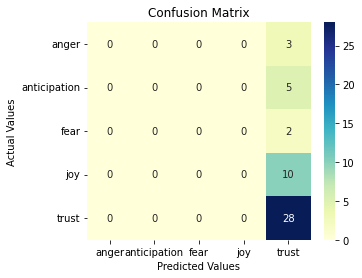

In [68]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test,y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
confusion = pd.DataFrame(conf,  index = ['anger','anticipation','fear','joy','trust'], 
                     columns = ['anger','anticipation','fear','joy','trust'])
                   

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion, annot=True, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()